# Compte rendu TP3 : Statistiques inférentielles

Dans ce TP nous nous proposons d'étudier la notion d'estimation statistiques. Nous allons donc parler d'estimation de paramètres et d'estimation d'intervalle de confiance.

## Estimation du paramètre p dans une expérience de Bernoulli

Dans cet exercice nous simulons une étude pour une élection présidentielle avec deux candidats (candidat A et candidat B). Nous nommons Xi la variable aléatoire qui détermine pour quel candidat un citoyen vote de tel sorte que :
* Xi = 1 si le citoyen vote pour le candidat A
* Xi = 0 si le citoyen vote pour le candidat B

Nous interrogeons n personnes au hasard, puis cherchons à determiner la probabilité qu'un citoyen vote pour le candidat A.

Notre but ici est de retrouver cette probabilité sur un échantillon que nous générons aléatoirement avec une probabilité aléatoire initiale.

Générons un probabilité aléatoire : 

In [96]:
import random
p = random.uniform(0, 1)
print(f"Probabilité généré p = {p}")

Probabilité généré p = 0.35912403021003014


Maintenant générons une population de n=100 

In [103]:
import numpy as np

# The expected value for the candidate A
x=1
# The number of person asked
n=100
ech = np.random.binomial(x, p, n)

Pour essayer de retrouver la valeure de p nous allons utiliser la moyenne : 

In [104]:
print(f"Estimated value of p is : {np.mean(ech)}")

Estimated value of p is : 0.47


On remarque que pour n = 100 la valeure estimée est assez loin de la valeure initiale de p cependant en augmentant le nombre d'individus la valeure estimée se rapproche de la valeure générée.

La suite consiste à prélever 1000 échantillons de 100 individus et d'étudier la moyenne d'échantillonnage. 

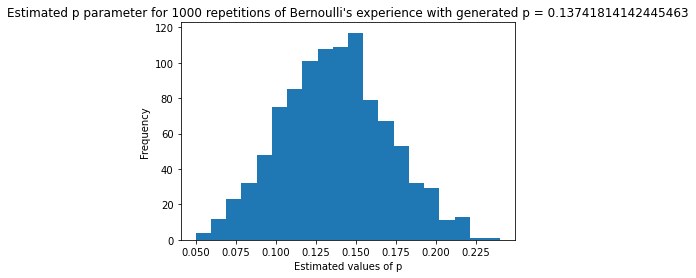

In [9]:
import matplotlib.pyplot as plt
N = 1000
data = []
for i in range(N):
    data.append(np.random.binomial(x, p, n))

means = np.mean(data, axis=1)
plt.hist(means, bins=20)
plt.xlabel("Estimated values of p")
plt.ylabel("Frequency")
t = plt.title(f"Estimated p parameter for 1000 repetitions of Bernoulli's experience with generated p = {p}")

Ainsi on voit que la répartition des paramètres p sur tous nos échantillons suivent une loi normale centrée sur la valeure estimée de p.

## Intervalles de confiance

Un intervalle de confiance nous permet de déterminer un interval dans lequel notre moyenne se trouvera à un taux d'erreur prêt. Ainsi notre interval sera de la forme \[moyenne - erreur , moyenne + erreur\]. 

Nous calculons l'erreur de la manière suivante (avec un coeficient d'erreur de 0.95): 

In [10]:
import scipy.stats as scp
import numpy as np

def marge_erreur_normal(coef, data):
    return scp.norm.ppf(1-(1-coef)/2) * (np.std(data)/np.sqrt(len(data)))

Par exemple pour un échantillon de données de 100 individus répartis selon la loi normal centrée en 1, nous calculons notre intervalle de la manière suivante : 

In [20]:
def ci_normal(data, coef):
    return np.mean(data) - marge_erreur_normal(coef, data), np.mean(data) + marge_erreur_normal(coef, data)

data = [np.random.normal(1) for i in range(0, 100)]
coef = 0.95
print(f"Mean value: {np.mean(data)}")
print(f"Edges: {ci_normal(data, coef)}")

Mean value: 1.0835205934576904
Edges: (0.8775482701512456, 1.2894929167641351)


Dans le cas de l'utilisation de fréquences (avec des expériences de bernoulli) le principe est le même:

In [21]:
def marge_erreur_bernoulli(coef, data, p):
    return scp.bernoulli.ppf(1-(1-coef)/2, p) * ((p * (1 - p))/np.sqrt(len(data)))


def calcul_interval_bernoulli(data, coef, p):
    return p - marge_erreur_bernoulli(coef, data, p), p + marge_erreur_bernoulli(coef, data, p)

x = 1
p = random.uniform(0, 1)
n = 100
data = np.random.binomial(x, p, n)

print(f"Frequency: {p}")
print(f"Edges: {calcul_interval_bernoulli(data, 0.95, p)}")

Frequency: 0.35023471069030765
Edges: (0.3274776748785092, 0.3729917465021061)


## Utilisation de l'interval de confiance

On créer un échantillon d'individus de taille n=100 qui suit une loi normale de moyenne 10 et et d'écart-type 5.

In [24]:
def create_sample(mean, deviation, n):
    return np.random.normal(loc=mean, scale=deviation, size=n)

Puis on fait 100 tirages d'échantillons sur lesquels nous allons calculer l'interval de confiance. Nous voulons étudier si notre interval de confiance est suffisament fiable et donc si notre échantillon est suffisament représentatif.

In [78]:
is_mean_in_edges_array = []
# number per sample
n = 10000
# number of of sample
i = 100
mu = 10
sigma = 5
error_coef = 0.95
for x in range(0, i):
    data = create_sample(mean=mu, deviation=sigma, n=n)
    inter = ci_normal(data, coef=error_coef)
    # We fill the array with 1 if the mean is between the edges and 0 otherwise
    is_mean_in_edges_array.append(1 if (inter[0] < 10 < inter[1]) else 0)

print(f"There is {is_mean_in_edges_array.count(0)} sample with their mean outside the edges and {is_mean_in_edges_array.count(1)} inside")
percentage = (is_mean_in_edges_array.count(1)/i) * 100
print(f"{percentage}% of the sample have their mean inside the edges for a given coef of {error_coef}")
if percentage >= error_coef * 100:
    print(f"The edges are well formed")
else:
    print(f"The edges are not well formed")

There is 4 sample with their mean outside the edges and 96 inside
96.0% of the sample have their mean inside the edges for a given coef of 0.95
The edges are well formed


On constate que nous somme jamais très loin des 95% mais qu'il y a des variations plus ou moins grande en fonction des simulations. Nous allons donc chercher si certains paramètres permettent d'ajuster ce pourcentage.

## Étude des intervals calculés

### Variation du nombre d'individu

Ici nous allons réaliser l'expérience précédente en la répétant avec un nombre d'individus par échantillons de plus en plus grand.

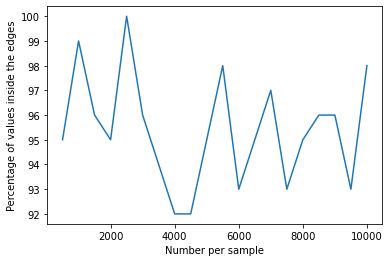

Mean percentage of error is: 95.4


In [86]:
trials = [i for i in range(500, 10500, 500)]
results = []
for n in trials:
    # number of sample
    i = 100
    mu = 10
    sigma = 5
    error_coef = 0.95
    is_mean_in_edges_array = []
    for x in range(0, i):
        data = create_sample(mean=mu, deviation=sigma, n=n)
        inter = ci_normal(data, coef=error_coef)
        # We fill the array with 1 if the mean is between the edges and 0 otherwise
        is_mean_in_edges_array.append(1 if (inter[0] < mu < inter[1]) else 0)
    
    percentage = (is_mean_in_edges_array.count(1)/i) * 100
    results.append(percentage)

plt.plot(trials, results)
plt.xlabel("Number per sample")
plt.ylabel("Percentage of values inside the edges")
plt.show()
print(f"Mean percentage of error is: {np.mean(results)}")

Sur ce graphique on remarque en faite que le nombre d'individu n'influe pas sur la qualité des intervales de confiance. C'est voit d'ailleurs que sur notre dernière expérience nous arrivons à un tôt d'erreur prêt de 95% ce qui correspond à notre coeficient d'erreur que nous avons fixé à 0,95.

### Variation du nombre de tirage
Ici nous allons réaliser l'expérience précédente en la répétant avec un nombre d'échantillons de plus en plus grand.

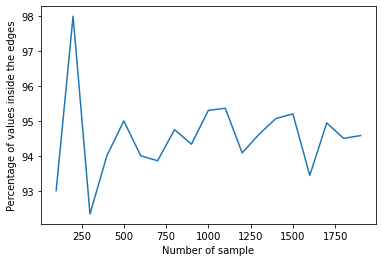

Mean percentage of error is: 94.54553769718956


In [89]:
trials = [i for i in range(100, 2000, 100)]
results = []
for i in trials:
    # number of sample
    n = 100
    mu = 10
    sigma = 5
    error_coef = 0.95
    is_mean_in_edges_array = []
    for x in range(0, i):
        data = create_sample(mean=mu, deviation=sigma, n=n)
        inter = ci_normal(data, coef=error_coef)
        # We fill the array with 1 if the mean is between the edges and 0 otherwise
        is_mean_in_edges_array.append(1 if (inter[0] < mu < inter[1]) else 0)
    
    percentage = (is_mean_in_edges_array.count(1)/i) * 100
    results.append(percentage)

plt.plot(trials, results)
plt.xlabel("Number of sample")
plt.ylabel("Percentage of values inside the edges")
plt.show()
print(f"Mean percentage of error is: {np.mean(results)}")

On fait le même constat que pour l'expérience précédente : le nombre d'échantillons n'influe pas sur la qualité de nos intervals de confiance.

## Conclusion

Dans ce TP nous avons apris à simuler des jeux de données afin de créer des outils d'estimations qui nous permettent de calculer des interval de confiance. Ces intervals sont représentatifs de notre population et ne deviennent forcément pas plus précis lorsque le nombre d'individus augmente. À l'inverse l'estimation d'une probabilité dans le cas d'une expérience de Bernoulli est bien plus précise lorsque l'on augmente le nombre de 